In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
FEATURE_INDEX = [x for x in range(57)]
LABEL_INDEX = 57

In [3]:
dataset = pd.read_csv(filepath_or_buffer='spambase/spambase.data', header = None)

print(len(dataset))
dataset.drop_duplicates()
print(len(dataset))

4601
4601


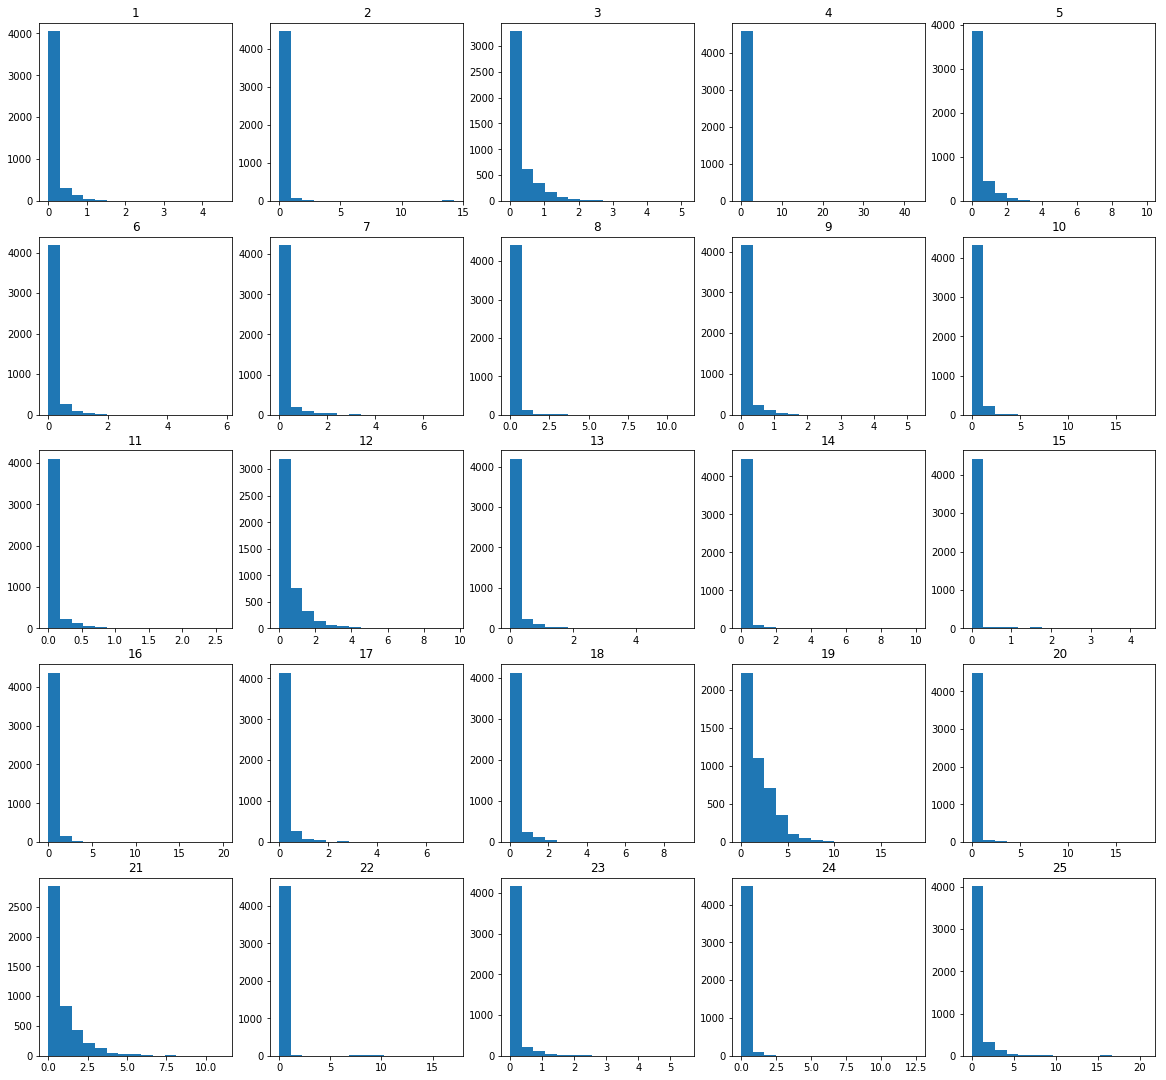

In [4]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i], bins = 15)
    plt.title(i+1)
plt.savefig('pretreatment/hist1.png', bbox_inches='tight')

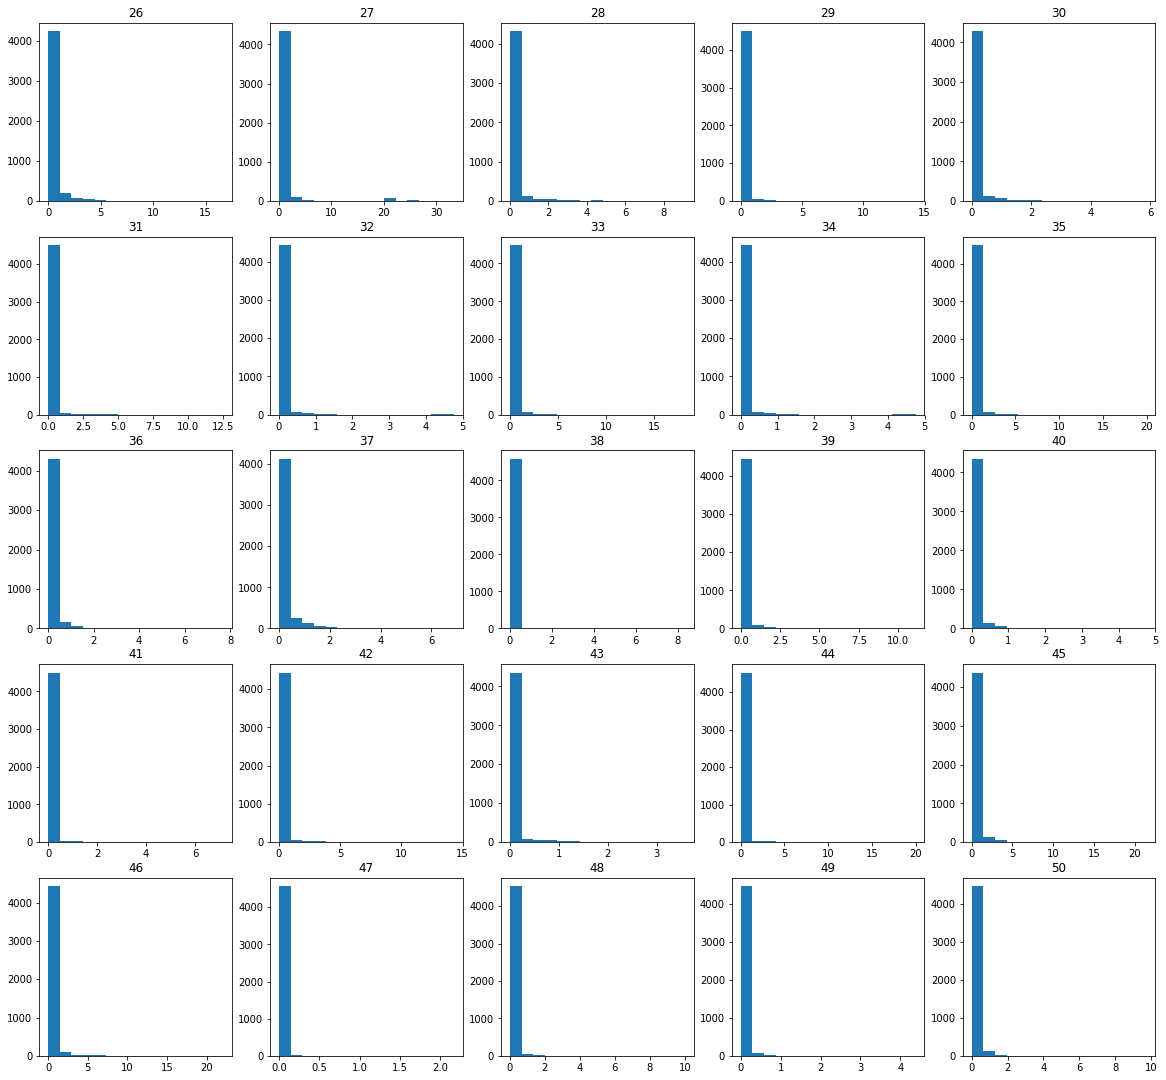

In [5]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i + 25], bins = 15)
    plt.title(i + 26)
plt.savefig('pretreatment/hist2.png', bbox_inches='tight')

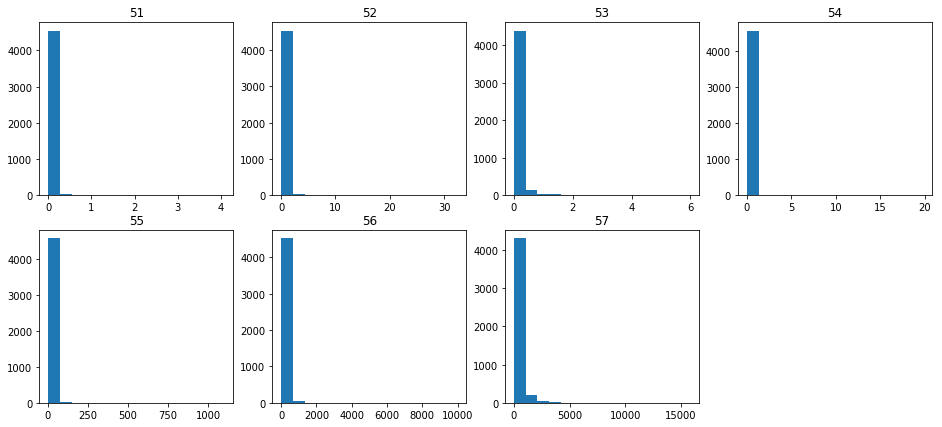

In [6]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.hist(dataset[i + 50], bins = 15)
    plt.title(i + 51)
plt.savefig('pretreatment/hist3.png', bbox_inches='tight')

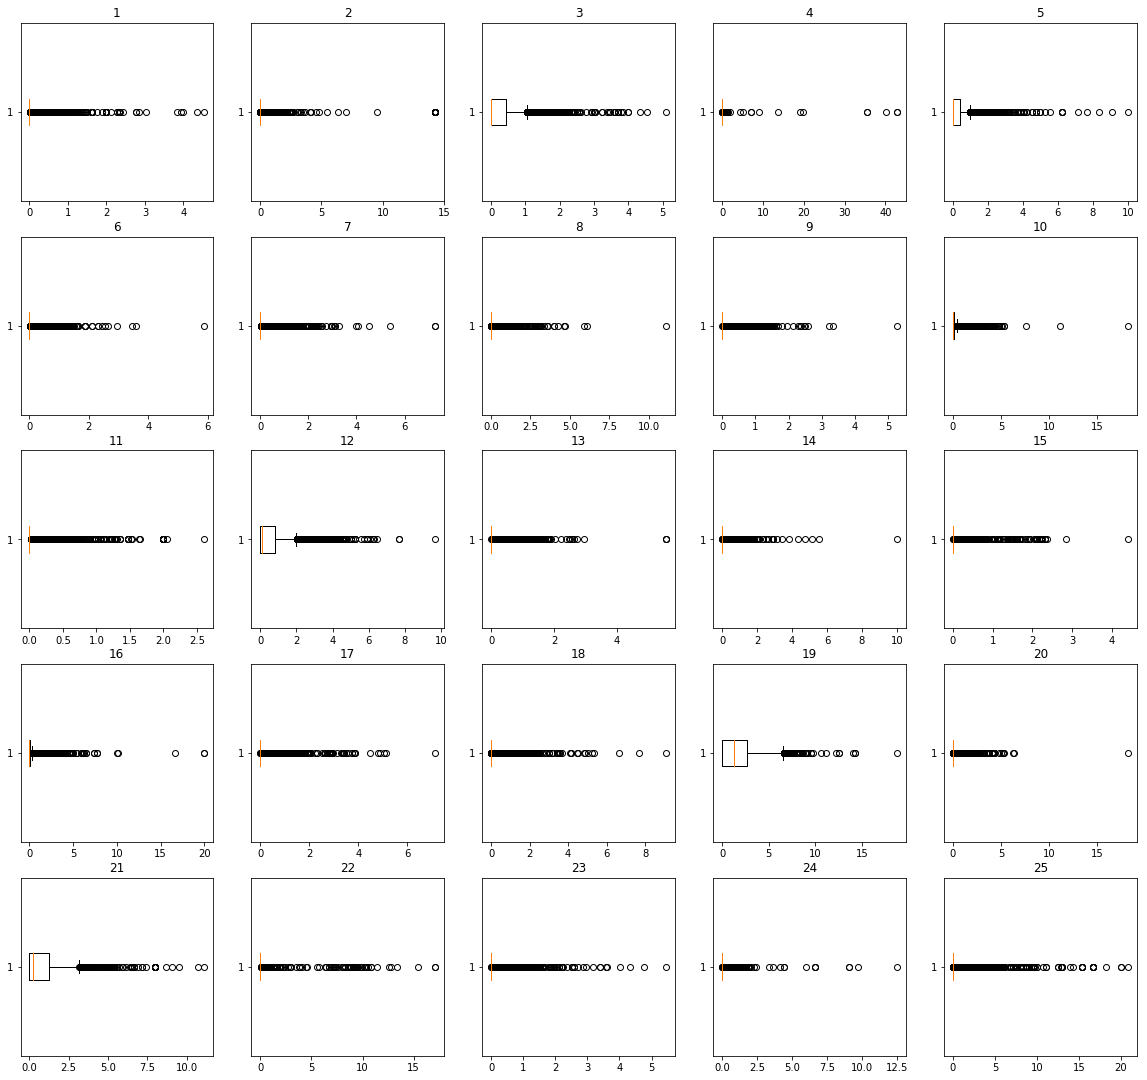

In [7]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i], vert=False)
    plt.title(i+1)
plt.savefig('pretreatment/box1.png', bbox_inches='tight')

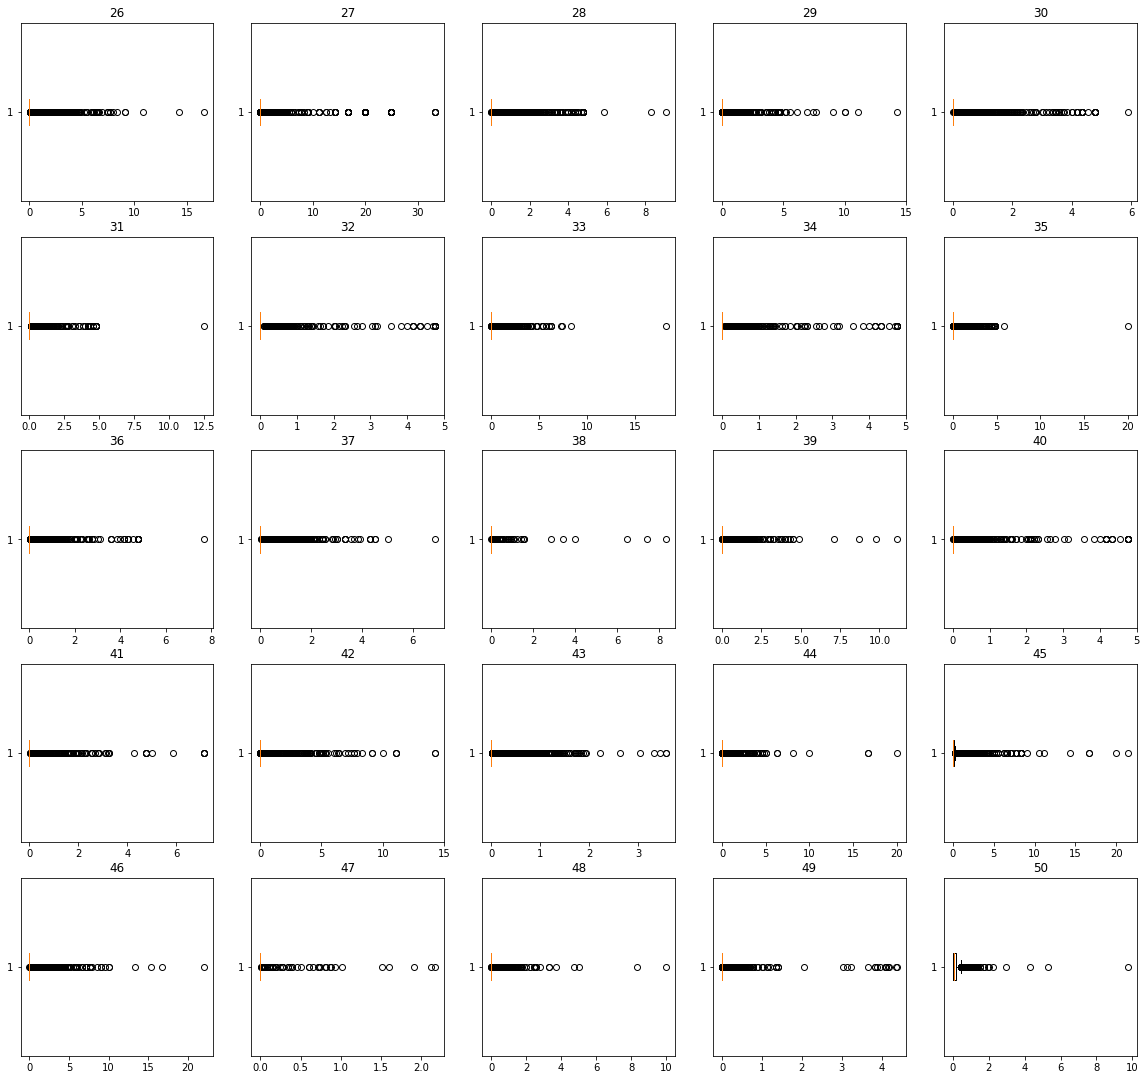

In [8]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i + 25], vert=False)
    plt.title(i + 26)
plt.savefig('pretreatment/box2.png', bbox_inches='tight')

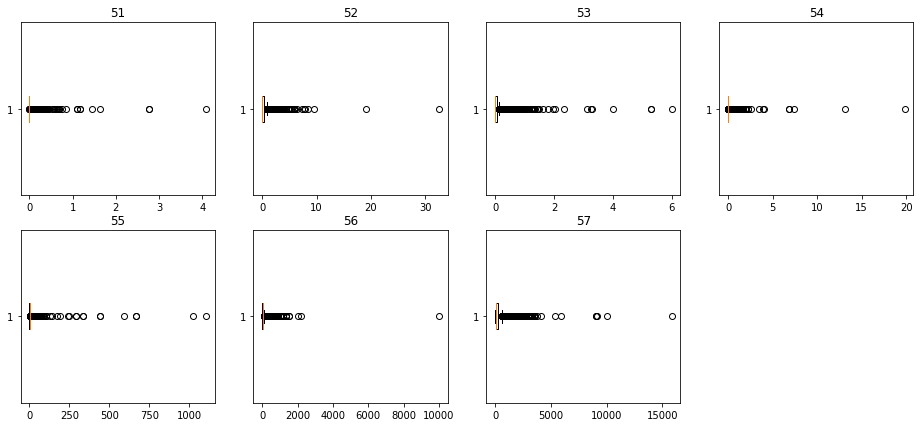

In [9]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset[i + 50], vert=False)
    plt.title(i + 51)
plt.savefig('pretreatment/box3.png', bbox_inches='tight')

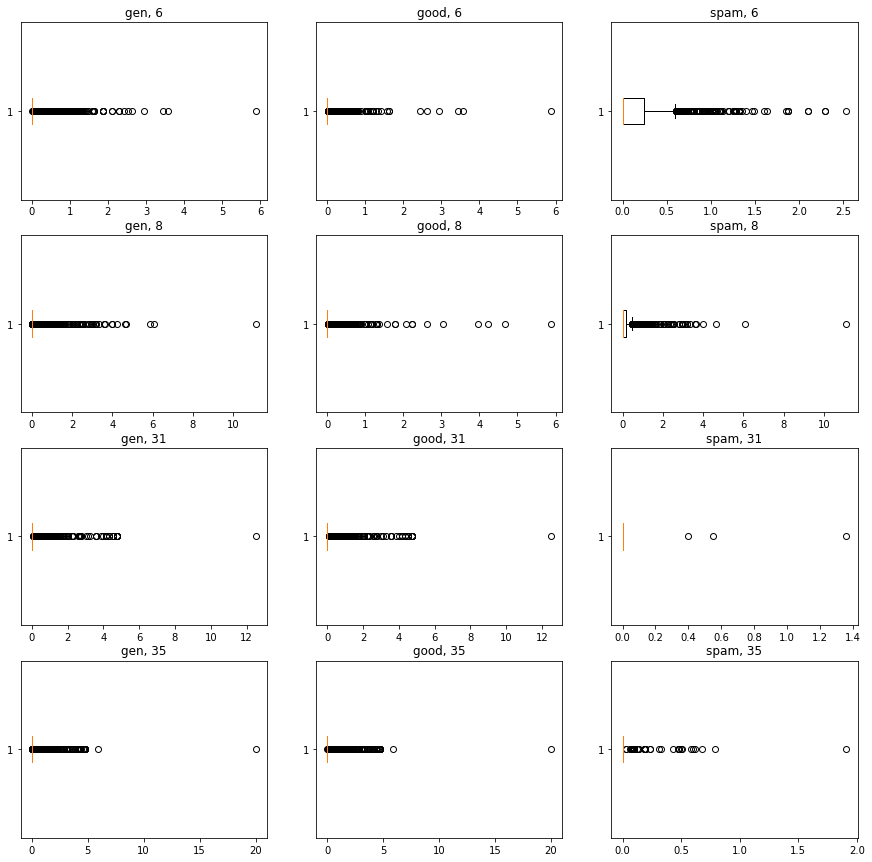

In [10]:
OUTLIER_LIST = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('gen, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset[dataset[57] == 0])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset[dataset[57] == 1])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/outlier_goodbad.png', bbox_inches='tight')

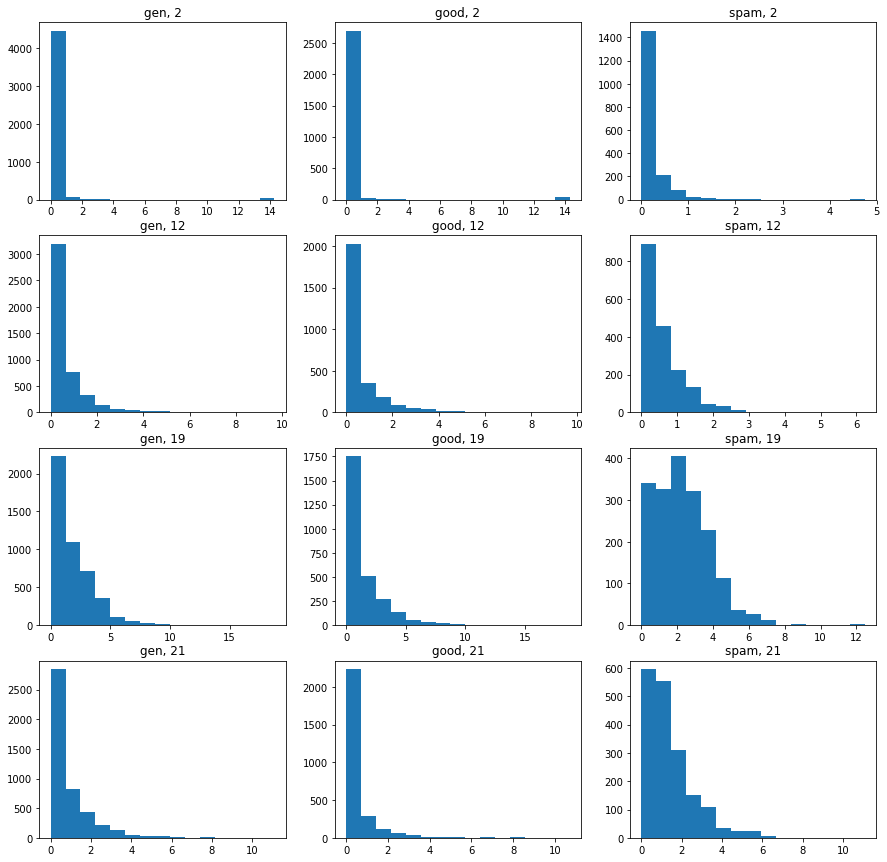

In [11]:
RESPECTIVE_LIST = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('gen, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset[dataset[57] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset[dataset[57] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/hist_gengoodspam.png', bbox_inches='tight')

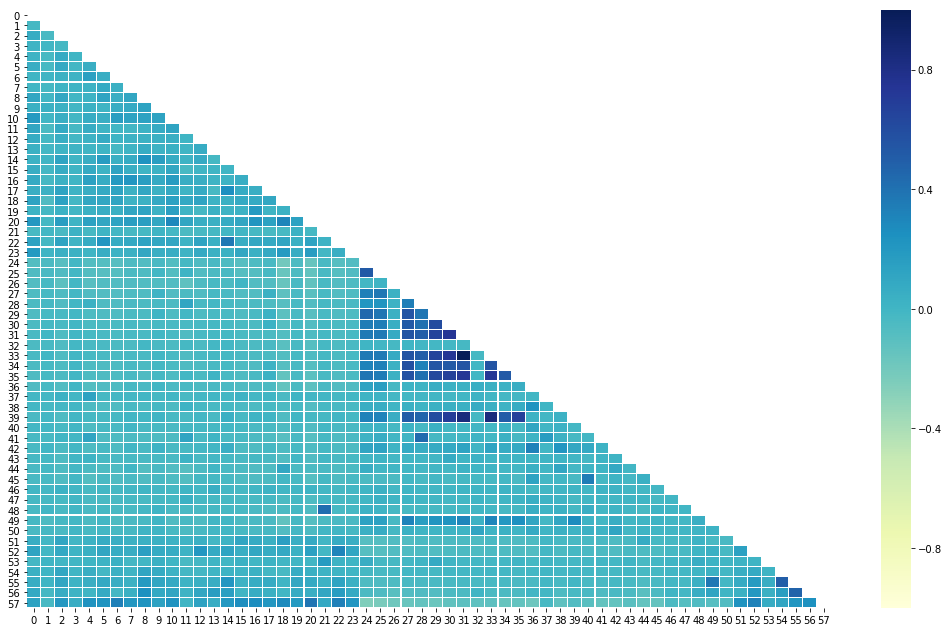

In [12]:
corr_of_dataset = np.array(dataset.corr())
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('pretreatment/heat_corr.png', bbox_inches='tight')

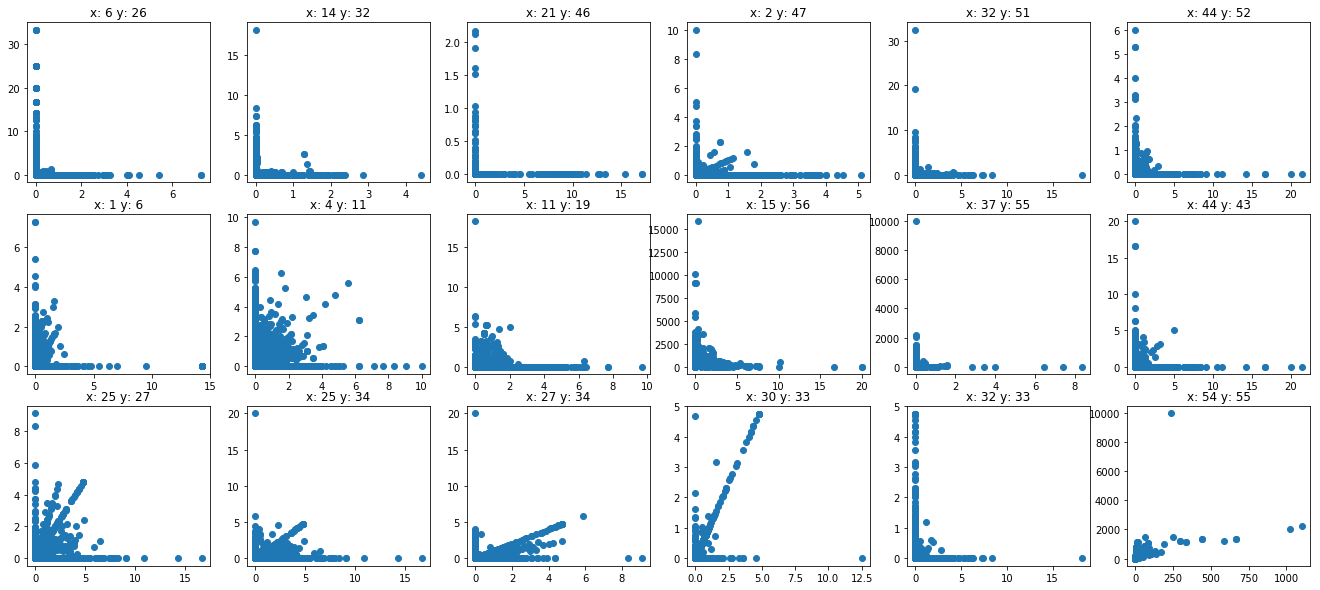

In [13]:
ATR_TO_SCATTER = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 56], [37, 55], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33], [54, 55]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(ATR_TO_SCATTER)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset[ATR_TO_SCATTER[i][0]], dataset[ATR_TO_SCATTER[i][1]])
    plt.title('x: '+str(ATR_TO_SCATTER[i][0])+' y: '+str(ATR_TO_SCATTER[i][1]))
plt.savefig('pretreatment/scatter_diag.png', bbox_inches='tight')

In [14]:
clf = svm.OneClassSVM(kernel="rbf")
clf.fit(dataset[FEATURE_INDEX])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [15]:
OUTLIER_FRACTION = 0.05
dist_to_border = clf.decision_function(dataset[FEATURE_INDEX]).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

(array([177.,  12.,   6.,   5.,   6.,   4.,   1.,   5.,   3.,   1.,   3.,
          4.,   1.,   2.,   1.]),
 array([-6.3928493 , -6.39156876, -6.39028822, -6.38900768, -6.38772714,
        -6.3864466 , -6.38516607, -6.38388553, -6.38260499, -6.38132445,
        -6.38004391, -6.37876337, -6.37748283, -6.37620229, -6.37492175,
        -6.37364121]),
 <a list of 15 Patch objects>)

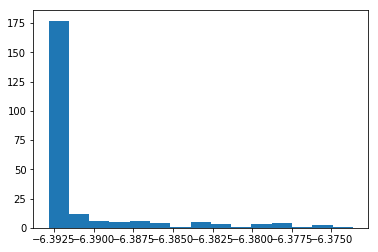

In [16]:
plt.hist(dist_to_border[is_inlier == False], bins = 15)

In [17]:
dataset_outlier = dataset[is_inlier == False]
dataset_inlier = dataset[is_inlier == True]
print('5%', len(dataset)*0.05)
print('95%', len(dataset)*0.95)
print('Outlier', len(dataset_outlier))
print('Inlier', len(dataset_inlier))
dataset_inlier.head()

5% 230.05
95% 4370.95
Outlier 231
Inlier 4370


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.00,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15,54,1


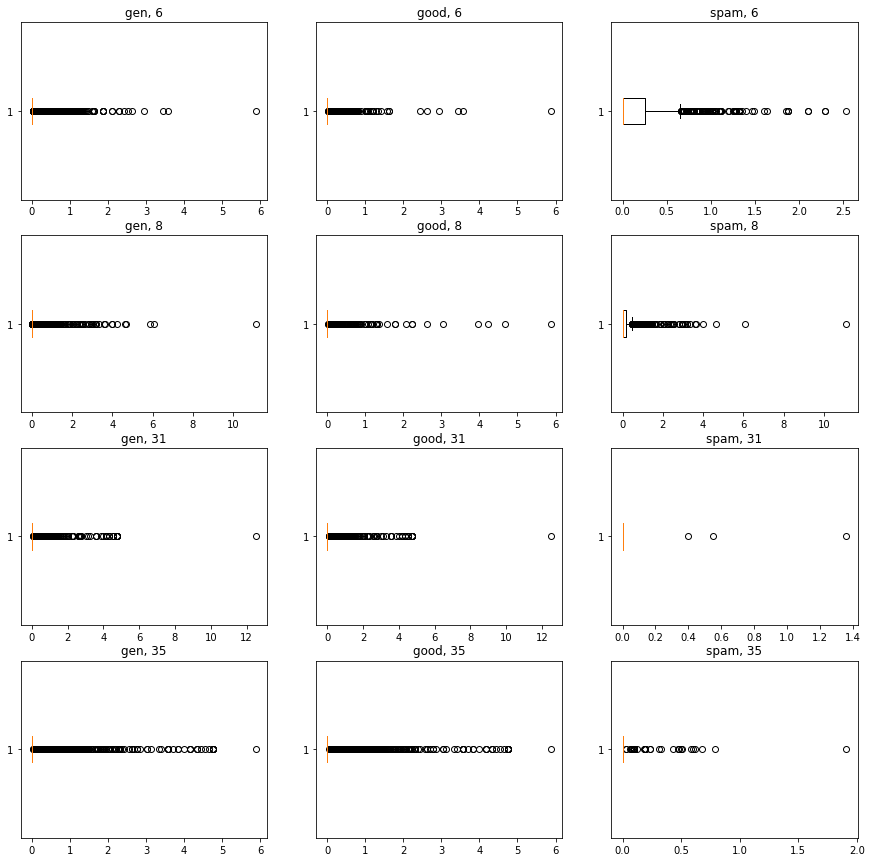

In [18]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_inlier[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('gen, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 0])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 1])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/after_svm_outlier_goodbad.png', bbox_inches='tight')

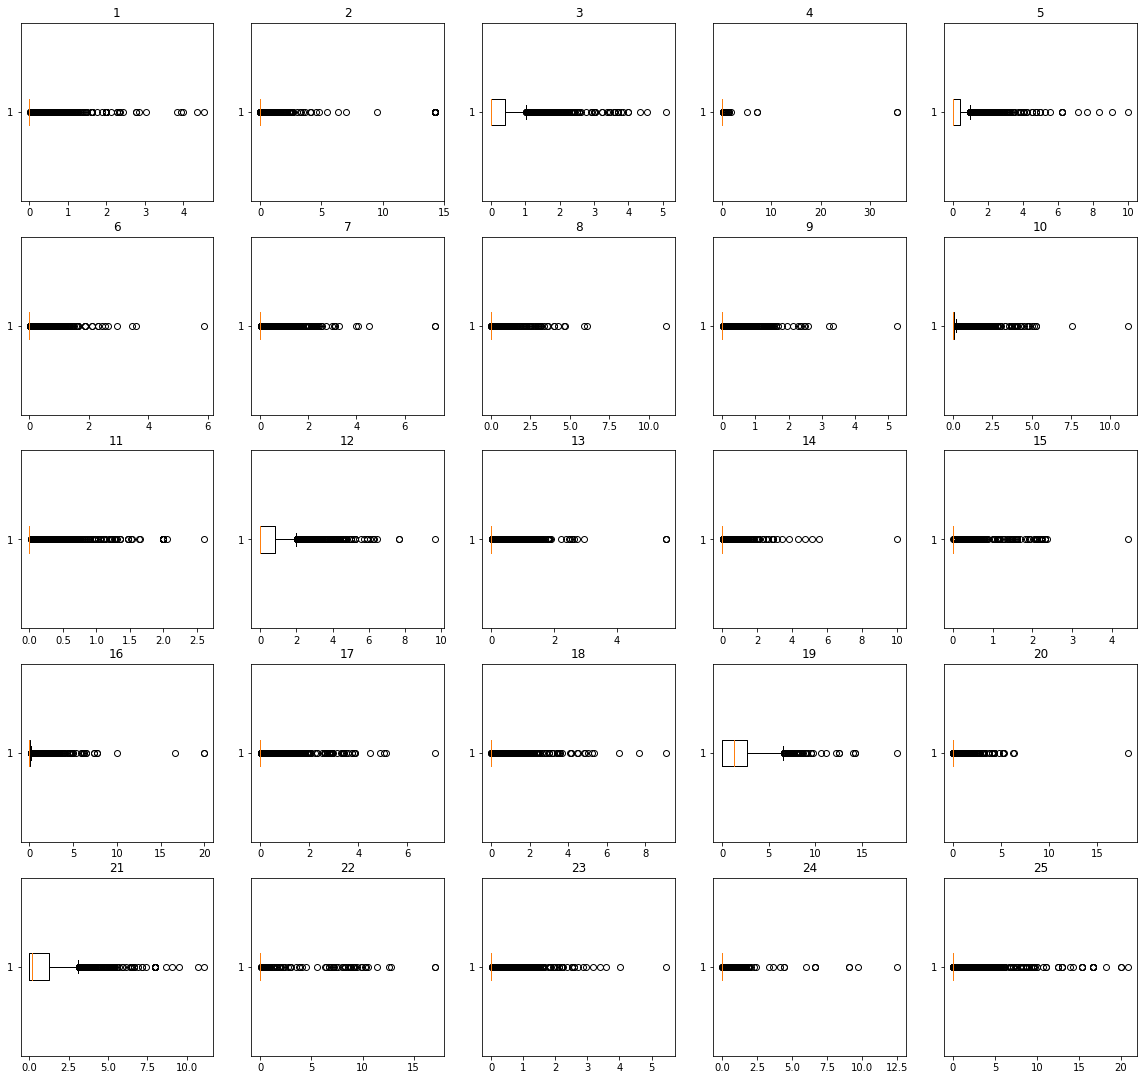

In [19]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_inlier[i], vert=False)
    plt.title(i+1)
plt.savefig('pretreatment/box1.png', bbox_inches='tight')

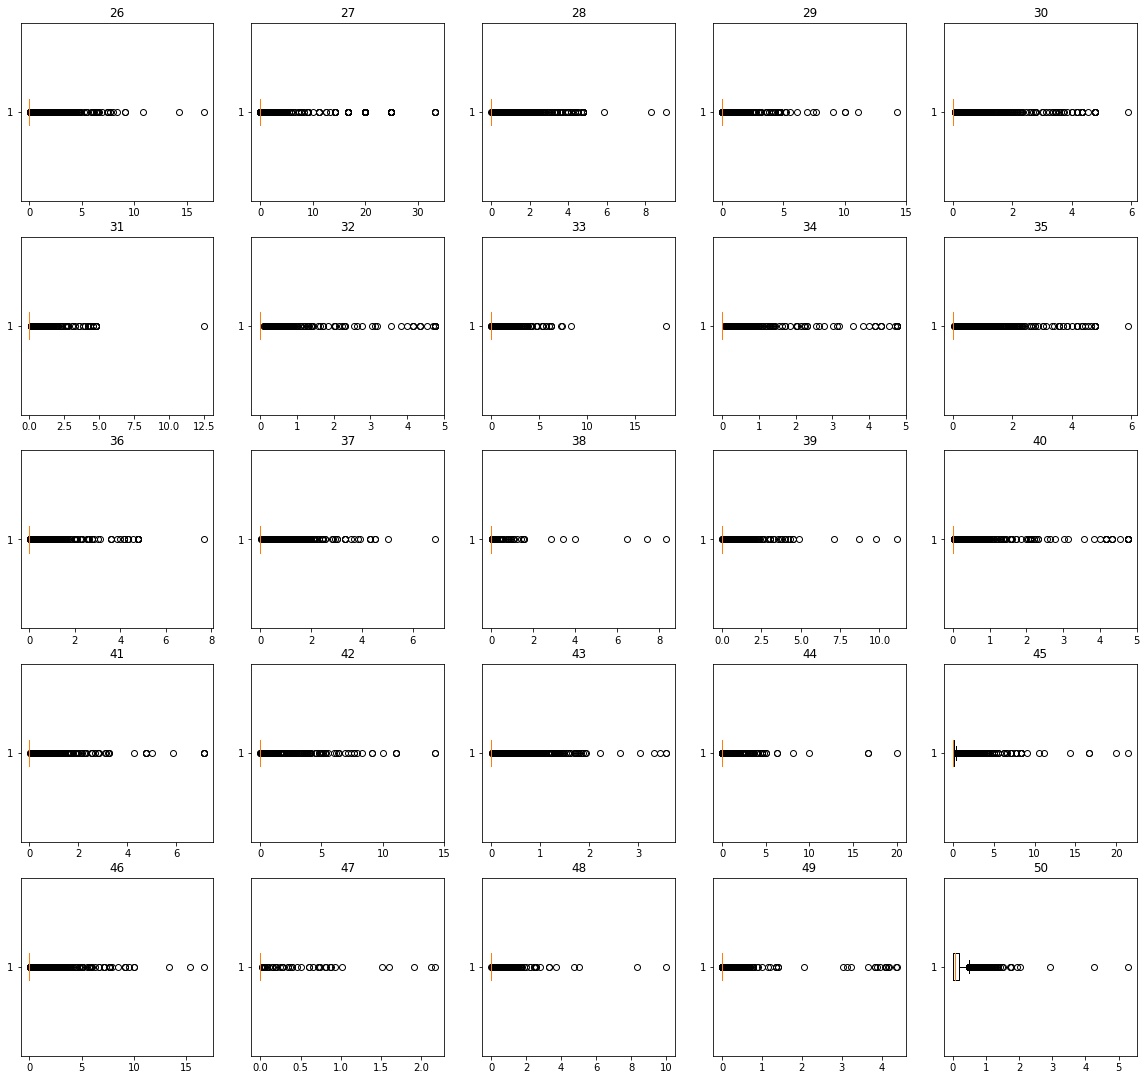

In [20]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_inlier[i + 25], vert=False)
    plt.title(i + 26)
plt.savefig('pretreatment/box2.png', bbox_inches='tight')

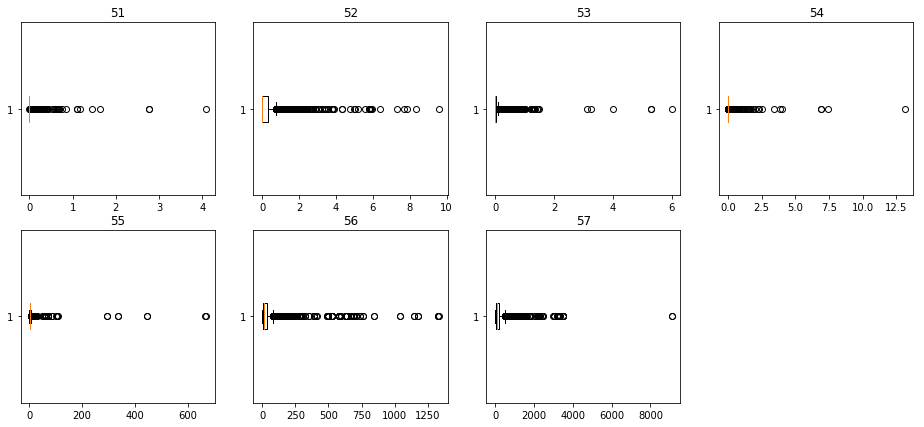

In [21]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset_inlier[i + 50], vert=False)
    plt.title(i + 51)
plt.savefig('pretreatment/box3.png', bbox_inches='tight')

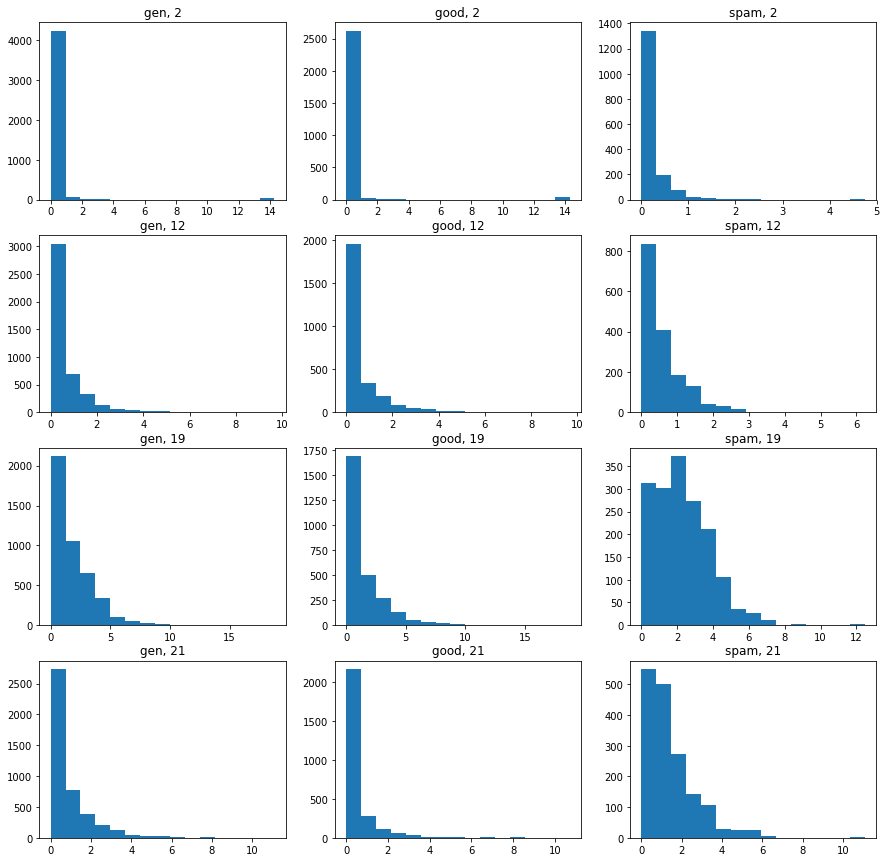

In [22]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_inlier[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('gen, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_inlier[dataset_inlier[57] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_inlier[dataset_inlier[57] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/after_svm_hist_gengoodspam.png', bbox_inches='tight')

In [23]:
dataset_inlier.loc[:, FEATURE_INDEX] = preprocessing.minmax_scale(dataset_inlier.loc[:, FEATURE_INDEX], feature_range=(0.1, 0.9))
dataset_inlier.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.100000,0.135854,0.200392,0.1,0.1256,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.1,0.100000,0.1,0.165003,0.100000,0.100000,0.103311,0.136036,0.124381,1
1,0.137004,0.115686,0.178431,0.1,0.1112,0.138095,0.123109,0.105041,0.100000,0.167687,...,0.1,0.120011,0.1,0.131081,0.123988,0.102925,0.104942,0.160060,0.190395,1
3,0.100000,0.100000,0.100000,0.1,0.1504,0.100000,0.134113,0.145365,0.147148,0.145365,...,0.1,0.120769,0.1,0.111446,0.100000,0.100000,0.103047,0.123423,0.116724,1
4,0.100000,0.100000,0.100000,0.1,0.1504,0.100000,0.134113,0.145365,0.147148,0.145365,...,0.1,0.120466,0.1,0.111279,0.100000,0.100000,0.103047,0.123423,0.116724,1
5,0.100000,0.100000,0.100000,0.1,0.2480,0.100000,0.100000,0.233213,0.100000,0.100000,...,0.1,0.133807,0.1,0.100000,0.100000,0.100000,0.102402,0.108408,0.104665,1


In [24]:
dataset_inlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 0 to 4600
Data columns (total 58 columns):
0     4370 non-null float64
1     4370 non-null float64
2     4370 non-null float64
3     4370 non-null float64
4     4370 non-null float64
5     4370 non-null float64
6     4370 non-null float64
7     4370 non-null float64
8     4370 non-null float64
9     4370 non-null float64
10    4370 non-null float64
11    4370 non-null float64
12    4370 non-null float64
13    4370 non-null float64
14    4370 non-null float64
15    4370 non-null float64
16    4370 non-null float64
17    4370 non-null float64
18    4370 non-null float64
19    4370 non-null float64
20    4370 non-null float64
21    4370 non-null float64
22    4370 non-null float64
23    4370 non-null float64
24    4370 non-null float64
25    4370 non-null float64
26    4370 non-null float64
27    4370 non-null float64
28    4370 non-null float64
29    4370 non-null float64
30    4370 non-null float64
31    4370 non-null float

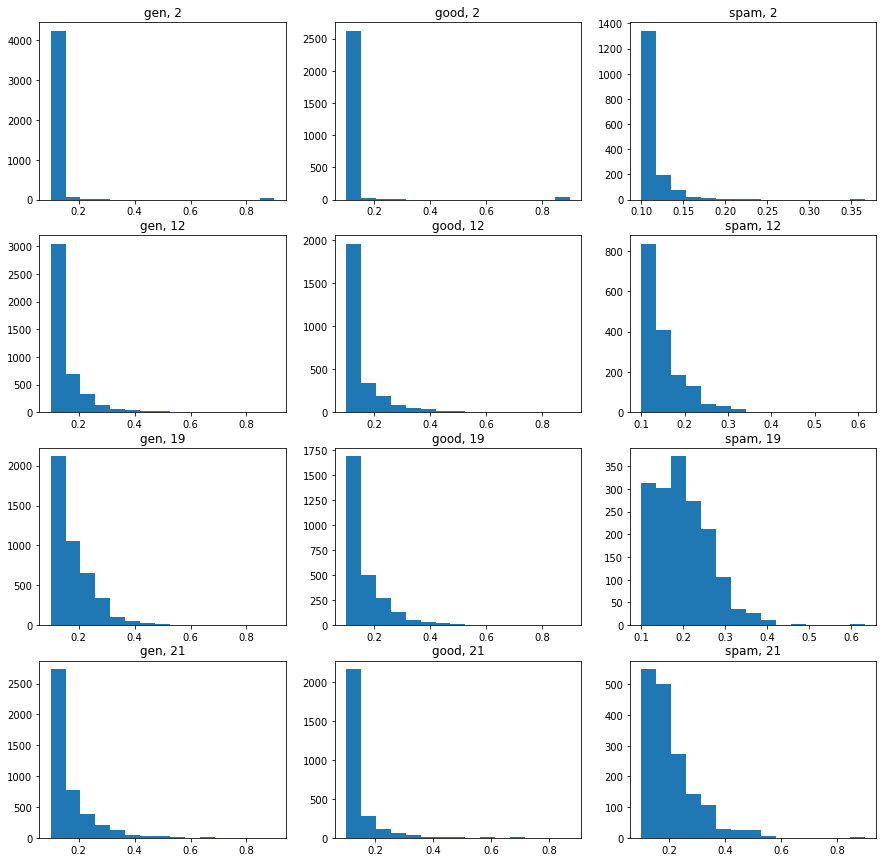

In [25]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_inlier[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('gen, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_inlier[dataset_inlier[57] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_inlier[dataset_inlier[57] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/scale_hist_gengoodspam.png', bbox_inches='tight')

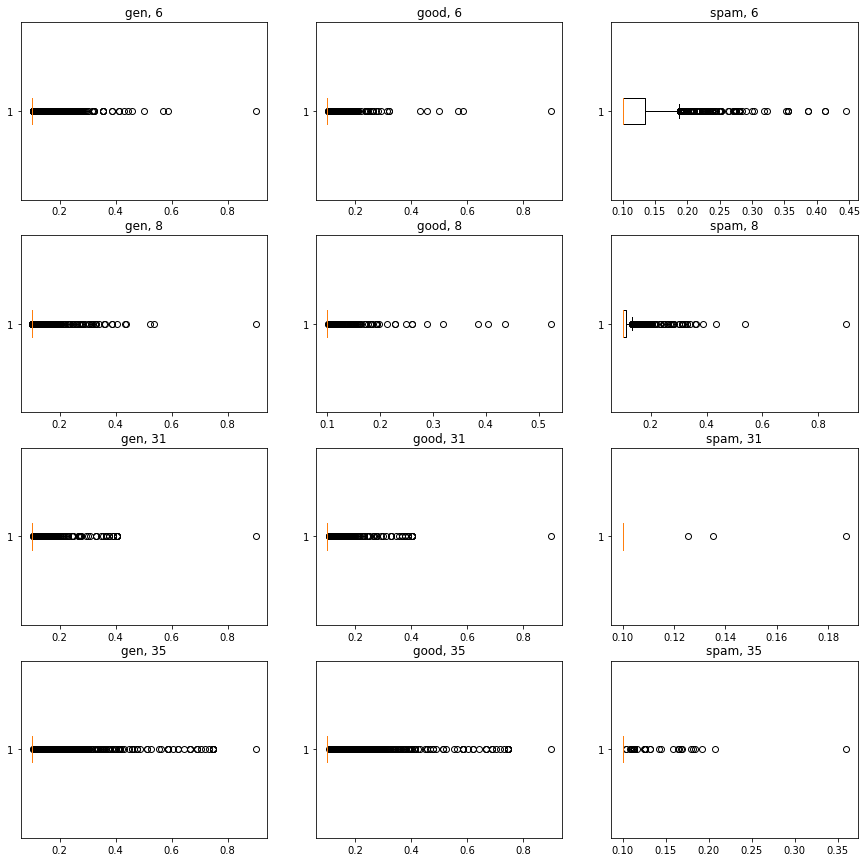

In [26]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_inlier[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('gen, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 0])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 1])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/scale_outlier_goodbad.png', bbox_inches='tight')

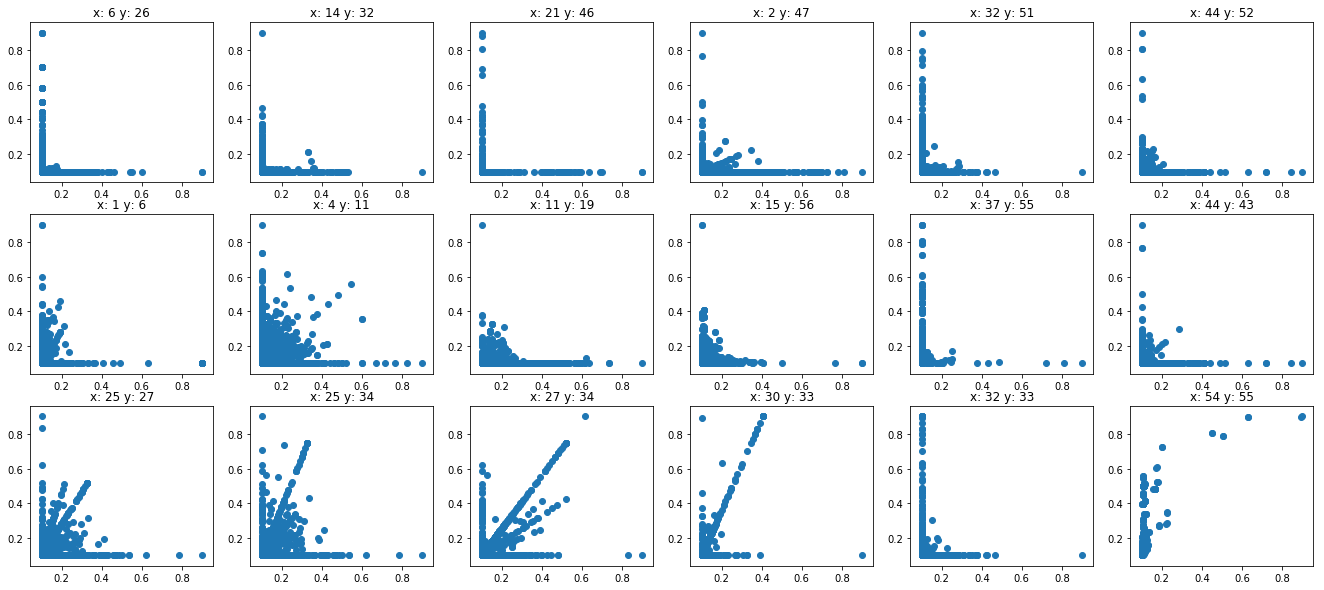

In [27]:
ATR_TO_SCATTER = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 56], [37, 55], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33], [54, 55]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(ATR_TO_SCATTER)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset_inlier[ATR_TO_SCATTER[i][0]], dataset_inlier[ATR_TO_SCATTER[i][1]])
    plt.title('x: '+str(ATR_TO_SCATTER[i][0])+' y: '+str(ATR_TO_SCATTER[i][1]))
plt.savefig('pretreatment/scale_scatter_diag.png', bbox_inches='tight')

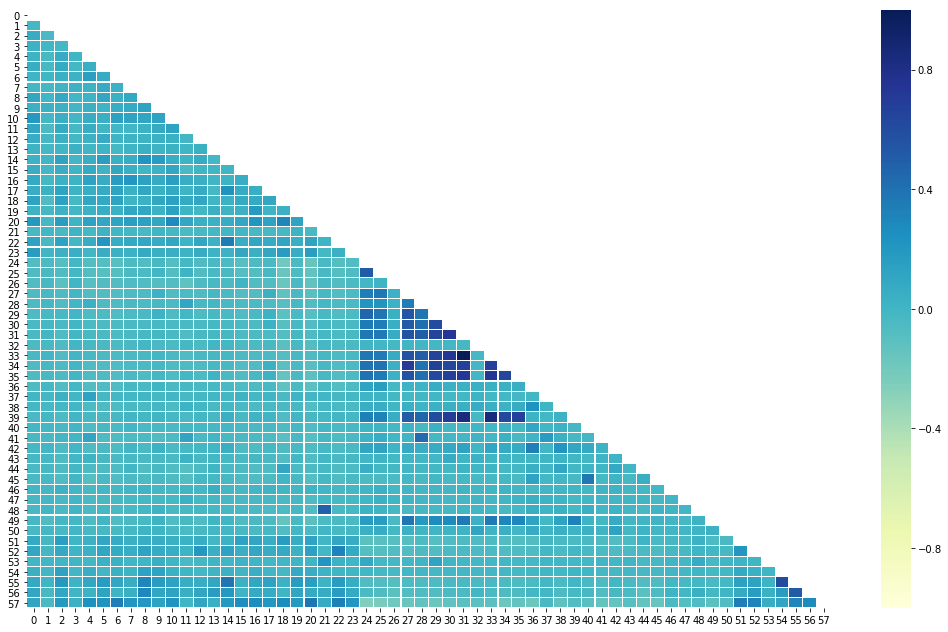

In [28]:
corr_of_dataset_inlier = np.array(dataset_inlier.corr())
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset_inlier)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset_inlier, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('pretreatment/heat_corr_clear.png', bbox_inches='tight')

In [29]:
end_dataset = PCA(n_components=50).fit_transform(dataset_inlier[FEATURE_INDEX])
end_dataset = pd.DataFrame(end_dataset)

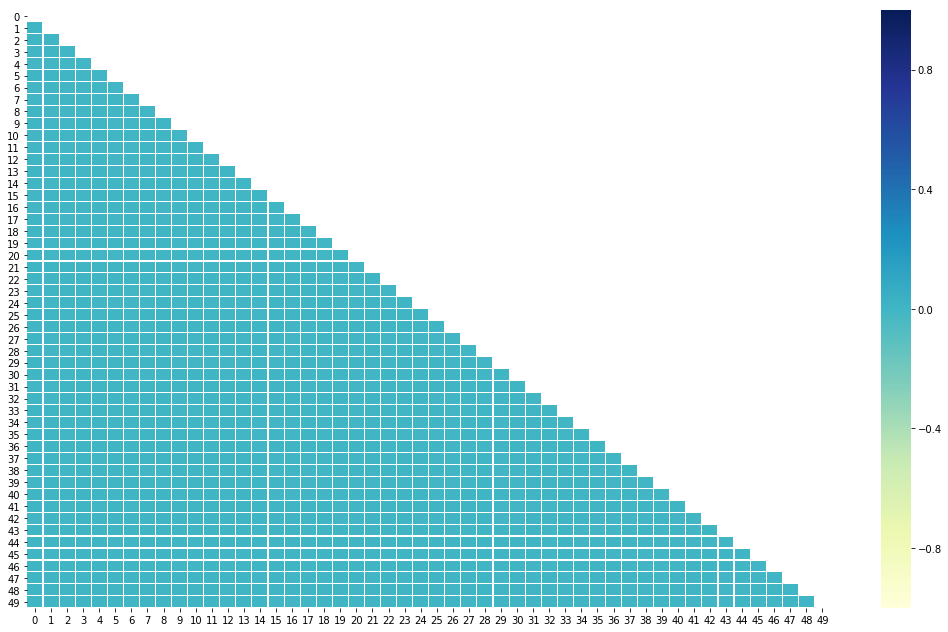

In [30]:
corr_end_dataset = end_dataset.corr()
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_end_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_end_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('pretreatment/heat_corr_features.png', bbox_inches='tight')

In [31]:
end_dataset[50] = np.array(dataset_inlier[57])
FEATURE_INDEX = np.arange(50)
LABEL_INDEX = 50
end_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 51 columns):
0     4370 non-null float64
1     4370 non-null float64
2     4370 non-null float64
3     4370 non-null float64
4     4370 non-null float64
5     4370 non-null float64
6     4370 non-null float64
7     4370 non-null float64
8     4370 non-null float64
9     4370 non-null float64
10    4370 non-null float64
11    4370 non-null float64
12    4370 non-null float64
13    4370 non-null float64
14    4370 non-null float64
15    4370 non-null float64
16    4370 non-null float64
17    4370 non-null float64
18    4370 non-null float64
19    4370 non-null float64
20    4370 non-null float64
21    4370 non-null float64
22    4370 non-null float64
23    4370 non-null float64
24    4370 non-null float64
25    4370 non-null float64
26    4370 non-null float64
27    4370 non-null float64
28    4370 non-null float64
29    4370 non-null float64
30    4370 non-null float64
31    4370 non-null float

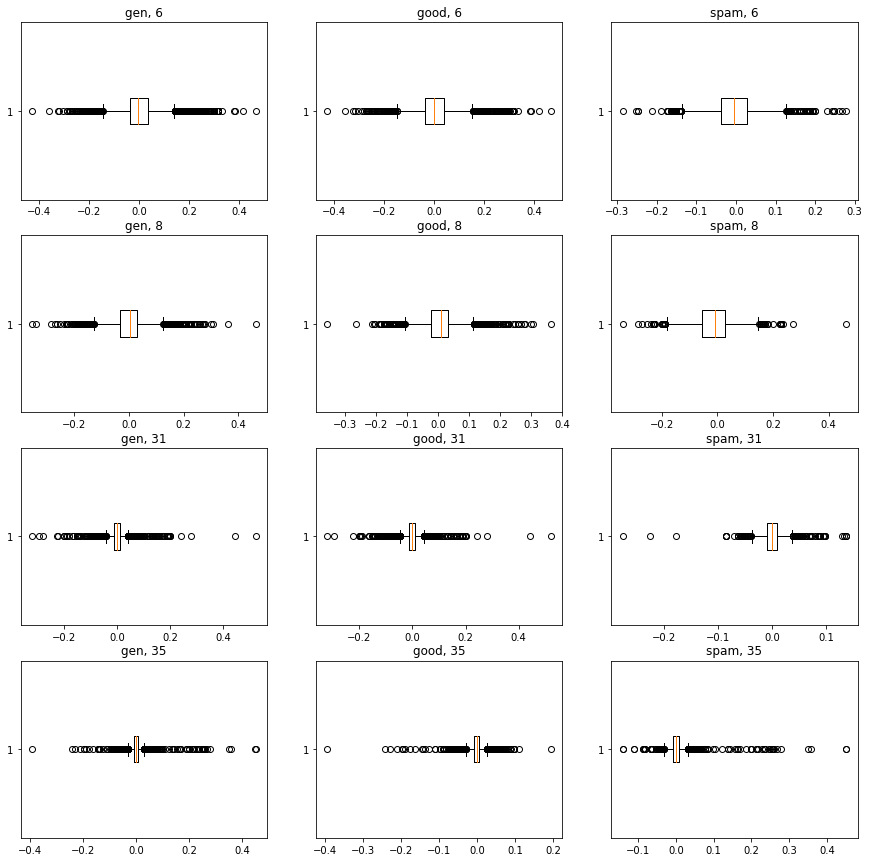

In [32]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(end_dataset[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('gen, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((end_dataset[end_dataset[LABEL_INDEX] == 0])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((end_dataset[end_dataset[LABEL_INDEX] == 1])[OUTLIER_LIST[k] - 1], vert=False)
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/end_outlier_goodbad.png', bbox_inches='tight')

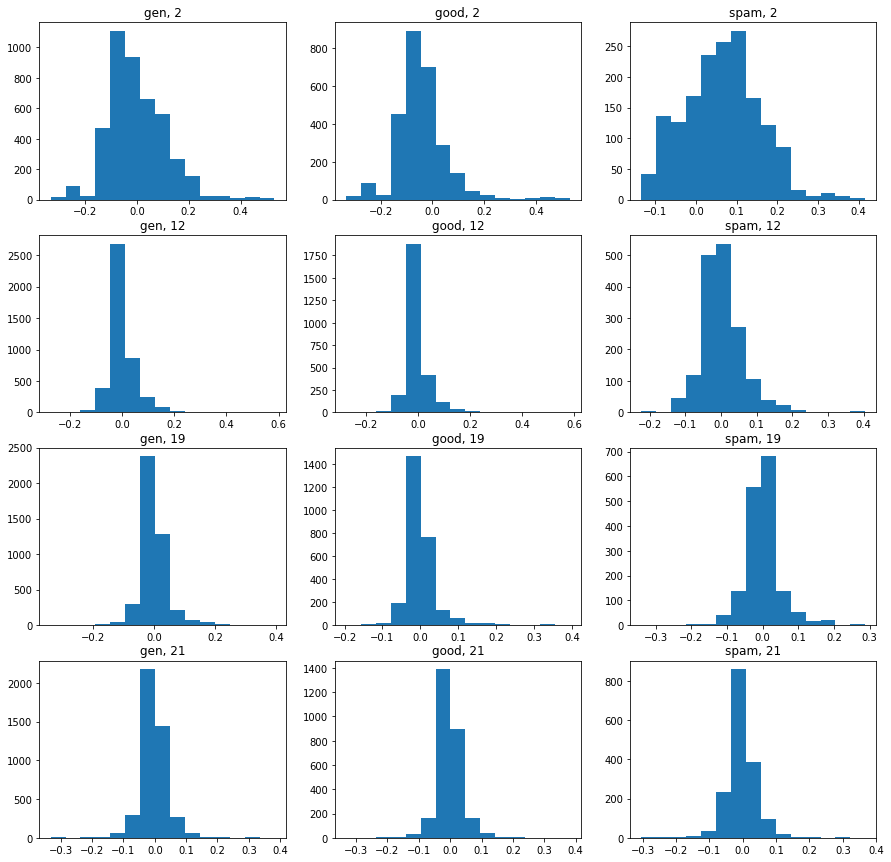

In [33]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(end_dataset[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('gen, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((end_dataset[end_dataset[LABEL_INDEX] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((end_dataset[end_dataset[LABEL_INDEX] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/end_scale_hist_gengoodspam.png', bbox_inches='tight')

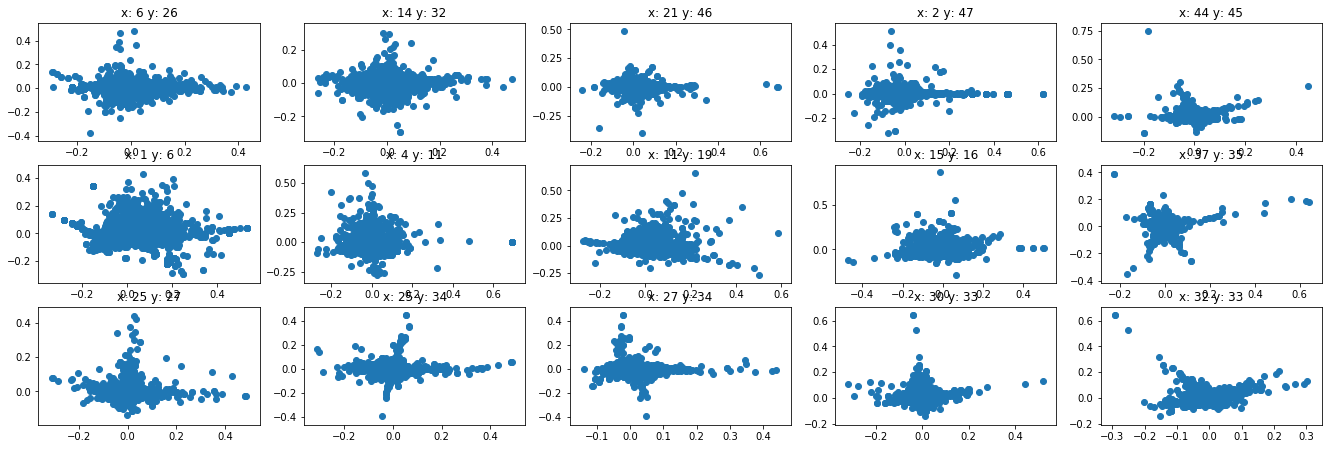

In [34]:
ATR_TO_SCATTER = [[6, 26], [14, 32], [21, 46], [2, 47], [44, 45], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 16], [37, 35], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(ATR_TO_SCATTER)):
    plt.subplot(4, 5, i+1)
    plt.scatter((end_dataset[FEATURE_INDEX])[ATR_TO_SCATTER[i][0]], (end_dataset[FEATURE_INDEX])[ATR_TO_SCATTER[i][1]])
    plt.title('x: '+str(ATR_TO_SCATTER[i][0])+' y: '+str(ATR_TO_SCATTER[i][1]))
plt.savefig('pretreatment/end_scale_scatter_diag.png', bbox_inches='tight')

In [37]:
end_dataset.to_csv('pretreatmented_data.csv', header=False, index=False)